In [23]:
import pandas as pd
import numpy as np

In [24]:
train_df=pd.read_csv('C:/Users/aimom/Desktop/train.csv')
test_df=pd.read_csv('C:/Users/aimom/Desktop/test.csv')
submission=pd.read_csv('C:/Users/aimom/Desktop/gender_submission.csv')


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
plt.style.use("ggplot")

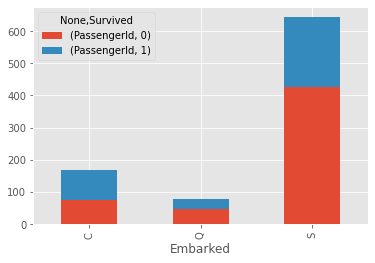

In [27]:
train_df[["Embarked","Survived","PassengerId"]].dropna()
train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count()
embarked_df=train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()
embarked_df.plot.bar(stacked=True)
embarked_df["survived_rate"]=embarked_df.iloc[:,0]/(embarked_df.iloc[:,0]+embarked_df.iloc[:,1])

<AxesSubplot:xlabel='Sex'>

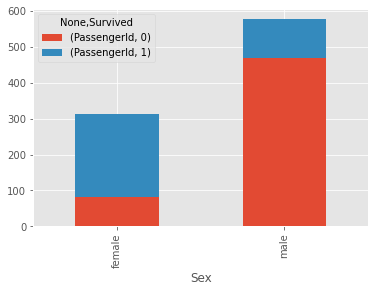

In [28]:
sex_df=train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

In [29]:
ticket_df=train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()

<AxesSubplot:xlabel='Pclass'>

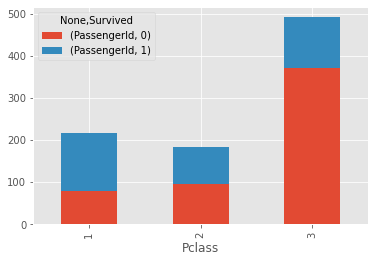

In [30]:
ticket_df.plot.bar(stacked=True)

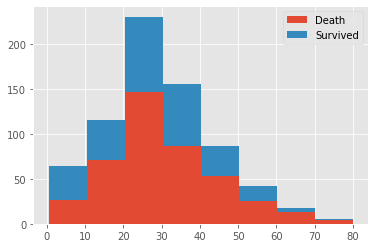

In [31]:
import matplotlib.pyplot as plt

plt.hist((train_df[train_df["Survived"]==0]["Age"].values, train_df[train_df["Survived"]==1]["Age"].values),
         histtype="barstacked", bins=8, label=("Death", "Survived"))
plt.legend()

In [32]:
train_df_corr=pd.get_dummies(train_df,columns=["Sex"],drop_first=True)
train_df_corr=pd.get_dummies(train_df_corr,columns=["Embarked"])
train_df_corr.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN         1           0           0   
1          PC 17599  71.2833   C85         0           1           0   
2  STON/O2. 3101282   7.9250   NaN         0           0           0   
3            113803  53.1000  C123         0           0           0   
4            373450   8.0500   NaN         1           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [33]:
train_corr=train_df_corr.corr()
train_corr

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Sex_male        0.042939 -0.543351  0.131900  0.093254 -0.114631 -0.245489   
Embarked_C     -0.001205  0.168240 -0.243292  0.036261 -0.059528 -0.011069   
Embarked_Q     -0.033606  0.003650  0.221009 -0.022405 -0.026354 -0.081228   
Embarked_S      0.022148 -0.155660  0.081720 -0.032523  0.070941  0.063036   

                 Fare  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
PassengerId  0.012658  0.042939   -0.001205   -0.033606    0.022148  
Survived     0.257307 -0.543351    0.168240    0.003650   -0.155660  
Pclass      -0.549500  0.131900   -0.243292    0.221009    0.081720  
Age          0.096067  0.093254    0.036261   -0.022405   -0.032523  
SibSp        0.159651 -0.114631   -0.059528   -0.026354    0.070941  
Parch        0.216225 -0.245489   -0.011069   -0.081228    0.063036  
Fare         1.000000 -0.182333    0.269335   -0.117216   -0.166603  
Sex_male    -0.182333  1.000000   -0.082853   -0.074115    0.125722  
Embarked_C   0.269335 -0.082853    1.000000   -0.148258   -0.778359  
Embarked_Q  -0.117216 -0.074115   -0.148258    1.000000   -0.496624  
Embarked_S  -0.166603  0.125722   -0.778359   -0.496624    1.000000

<AxesSubplot:>

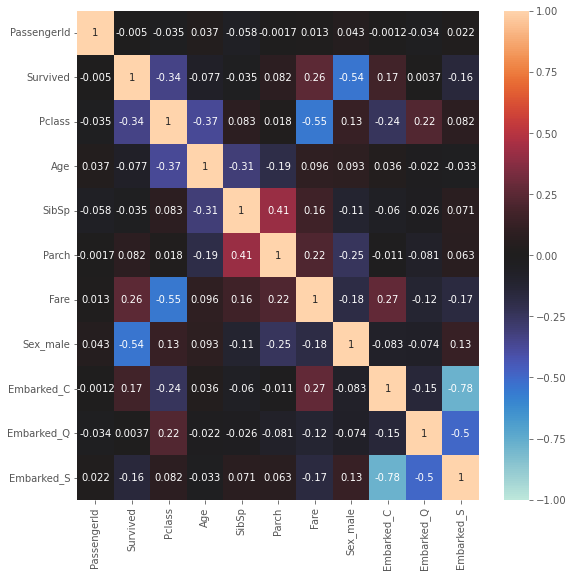

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr,vmax=1,vmin=-1,center=0,annot=True)

In [35]:
all_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)

In [36]:
all_df

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [37]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64